In [1]:
# ---- Explore cleaned data from vw_valcar_cleaned view (view used to clean all of data values)
# Import 
import scripts.utils as ut
from scripts.db_utils import get_db_engine, open_connection, close_connection
from sqlalchemy import text
import matplotlib.pyplot as plt

# db connection
engine = get_db_engine()
conn = open_connection(engine)

🔍 Loading .env
🔧 Variables loaded: user=user, host=localhost, db=livingcost


In [3]:
# Summary Dataframe of cleaned data 
query = "SELECT * FROM vw_valcar_cleaned;"
df = ut.pd.read_sql(query, conn)
print(f"✅ Loaded cleaned view with {len(df)} rows and {df.shape[1]} columns")
df.head()

✅ Loaded cleaned view with 39893 rows and 5 columns


,CityName,Country,Paramethers,Category,MeanPrice
0,Delhi,India,apartment (1 bedroom) in city centre,Apartments / Real Estate,223.87
1,Shanghai,China,apartment (1 bedroom) in city centre,Apartments / Real Estate,1080.07
2,Jakarta,Indonesia,apartment (1 bedroom) in city centre,Apartments / Real Estate,482.85
3,Manila,Philippines,apartment (1 bedroom) in city centre,Apartments / Real Estate,559.52
4,Seoul,South korea,apartment (1 bedroom) in city centre,Apartments / Real Estate,809.83


In [4]:
# Overview of right cleaning 
print("\n🔍 Missing values per column:")
print(df.isnull().sum())

print("\n🔁 Duplicates:", df.duplicated().sum())


🔍 Missing values per column:
CityName       0
Country        0
Paramethers    0
Category       0
MeanPrice      0
dtype: int64

🔁 Duplicates: 0


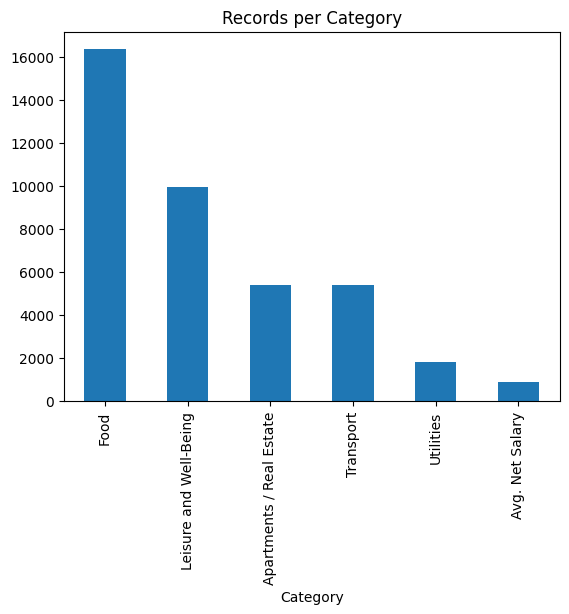

In [5]:
# Record per Category Overview
cat_counts = df['Category'].value_counts()
cat_counts.plot(kind='bar', title='Records per Category')

# Export png graph
path = ut.os.path.join(ut.repo_root, 'docs', 'img', 'DistributionByCategory.png')
plt.savefig(path, dpi=300, bbox_inches='tight')

In [6]:
# close connection
close_connection(conn)

✅ DB connection closed
